In [251]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from typing import Tuple, MutableSequence
import random
import math
from basic_units import radians


In [107]:
def get_rad_ticks(range_start: int = 0, range_stop: int = 2, step: int = 1) -> Tuple:
    # """Generate ticks and labels for them in given interval

    #   Parameters
    #   ----------
    #   range_start: int
    #     Left edge of the interval. Will be included in the range.
    #   range_stop: int
    #     Right edge of the interval. Won't be included in the range.
    #   step: int
    #      An integer number specifying the incrementation.

    #   Returns
    #   -------
    #   Tuple
    #     Tuple with two arrays: ticks and labels
    # """
    labels = []

    for i in range(range_start, range_stop, step):
        if i == 0:
            labels.append(str(i))
            continue
        if i == 1:
            labels.append('π')
            continue
        if i == -1:
            labels.append('-π')
            continue
        labels.append(str(i) + 'π')
    
    ticks = [i*math.pi for i in range(range_start, range_stop, step)]
    return ticks, labels

In [74]:
def noise(freq, series_len):
  # """Return single frequency noise

  #   Parameters
  #   ----------
  #   freq: int
  #     Noise frequency
  #   series_len: int
  #     Length of noise vector
  #
  #   Returns
  #   -------
  #   [float]
  #     The noise vector of a given frequency
  # """
  phase = random.uniform(0, 2*math.pi)
  return np.array([math.sin(2*math.pi * freq*x/series_len + phase) for x in range(series_len)])

In [75]:
def generate_noise(series_len = 1_000, amplitude = lambda f: 1, frequencies = range(1, 1001), random_seed = 0, debugging = False):
  # """Generates noise of different spectrum

  #   Parameters
  #   ----------
  #   series_len: int
  #     Length of noise vector
  #   amplitude: Callable[[int], float]
  #     Should return amplitude depending on frequency. Return const 1 by default.
  #   frequencies: [int]
  #     Range of frequencies
  #   random_seed: int
  #     Value for random.seed()
  #   debugging: boolean
  #     Flag to activate debug mode
  #
  #   Returns
  #   -------
  #   [float]
  #     The noise vector of a given spectrum
  # """
  random.seed(random_seed)
  sum_of_noises = [0.0] * series_len
  amplitudes = np.array([amplitude(f) for f in frequencies])
  noises = np.array([noise(f, series_len) for f in frequencies])

  if debugging:
    print('amplitudes length = {}'.format(len(amplitudes)))
    print('noises length = {}'.format(len(noises)))

  for k in range(len(noises)):
    sum_of_noises += amplitudes[k] * noises[k]

  return sum_of_noises

In [76]:
def derivative_next_value(x_t: float, f_t: float = 0) -> float:
  # """Calculate value of x'(t+1) depending on x(t) and f(t)

  #   Parameters
  #   ----------
  #   x_t: float
  #     Value of the function in point t
  #   f_t: float
  #     Noise in point t

  #   Returns
  #   -------
  #   float
  #     Value of the derivative in point t+1
  # """
  return np.sin(x_t) + f_t


In [77]:
def function_next_value(x_t: float, delta: float = 0.1, f_t: float = 0) -> float:
  # """Calculate value of x(t+1) depending on x(t), f(t) and delta t

  #   Parameters
  #   ----------
  #   x_t: float
  #     Value of the function in point t
  #   delta: float
  #     Increment of the argument
  #   f_t: float
  #     Noise in point t

  #   Returns
  #   -------
  #   float
  #     Value of the function in point t+1
  # """
  d_t = derivative_next_value(x_t, f_t)
  return x_t + delta*d_t

In [252]:
def get_samples(series_len: int = 105, random_seed: int = 0, noise: MutableSequence[float] = None) -> Tuple:
    # """Calculate value of x(t+1) depending on x(t), f(t) and delta t

    #   Parameters
    #   ----------
    #   series_len: int
    #     Length of noise vector
    #   random_seed: int
    #     Value for random.seed()
    #   noise: MutableSequence[float]
    #     Noise vector

    #   Returns
    #   -------
    #   Tuple
    #     Two vectors: function values in the time points and values of derivative of this function in the same points of time
    # """
    random.seed(random_seed)

    if noise is None:
        noise = [0 for _ in range(series_len)]

    x_t = np.random.rand()
    x_ts = []
    d_ts = []
    x_ts.append(x_t)
    d_ts.append(derivative_next_value(x_t))

    for t in range(series_len):
        x_t = function_next_value(x_t, f_t=noise[t])
        d_t = derivative_next_value(x_t, f_t=noise[t])
        x_ts.append(x_t)
        d_ts.append(d_t)

    return x_ts, d_ts

## Common settings

In [240]:
series_len = 105
random.seed(0)

# Without noise

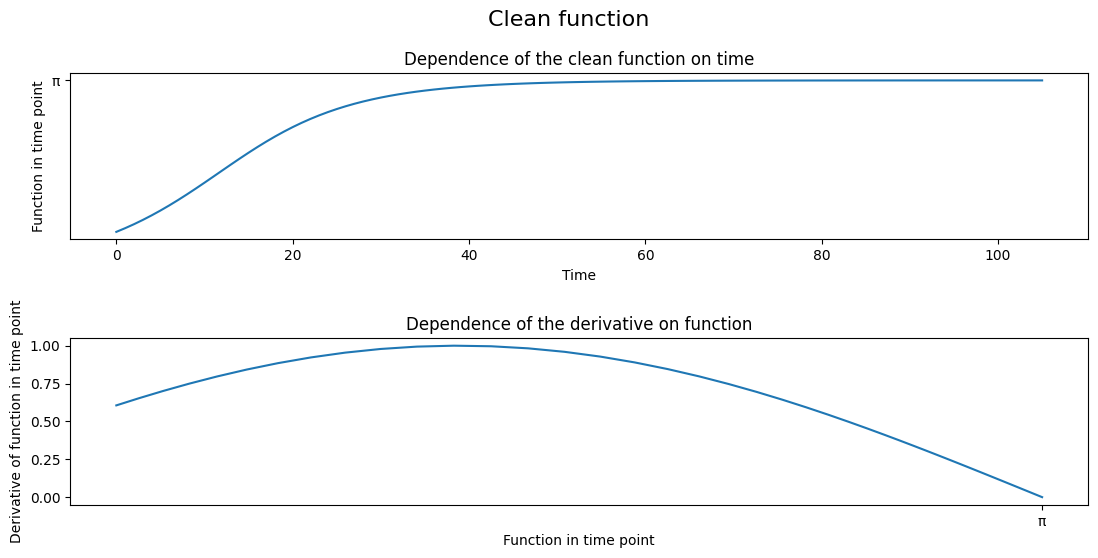

In [241]:
x_ts, d_ts = get_samples()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
fig.tight_layout(pad=5.)
fig.suptitle('Clean function', fontsize=16)

ax1.set_yticks(*get_rad_ticks(0, 2))
ax1.set_title('Dependence of the clean function on time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Function in time point')
ax1.plot(x_ts)

ax2.set_xticks(*get_rad_ticks(0, 2))
ax2.set_title('Dependence of the derivative on function')
ax2.set_xlabel('Function in time point')
ax2.set_ylabel('Derivative of function in time point')
ax2.plot(x_ts, d_ts)

# White noise

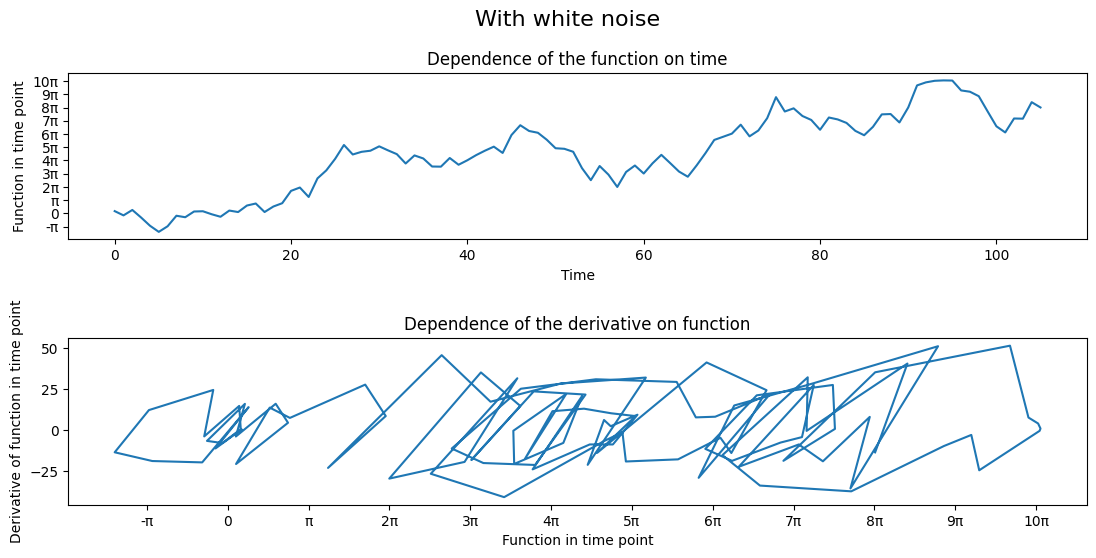

In [242]:
white_noise = generate_noise(series_len)
x_ts, d_ts = get_samples(noise=white_noise)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
fig.tight_layout(pad=5.)
fig.suptitle('With white noise', fontsize=16)

ax1.set_yticks(*get_rad_ticks(-14, 12, 1))
ax1.set_title('Dependence of the function on time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Function in time point')
ax1.plot(x_ts)

ax2.set_xticks(*get_rad_ticks(-14, 12, 1))
ax2.set_title('Dependence of the derivative on function')
ax2.set_xlabel('Function in time point')
ax2.set_ylabel('Derivative of function in time point')
ax2.plot(x_ts, d_ts)

## Brown noise

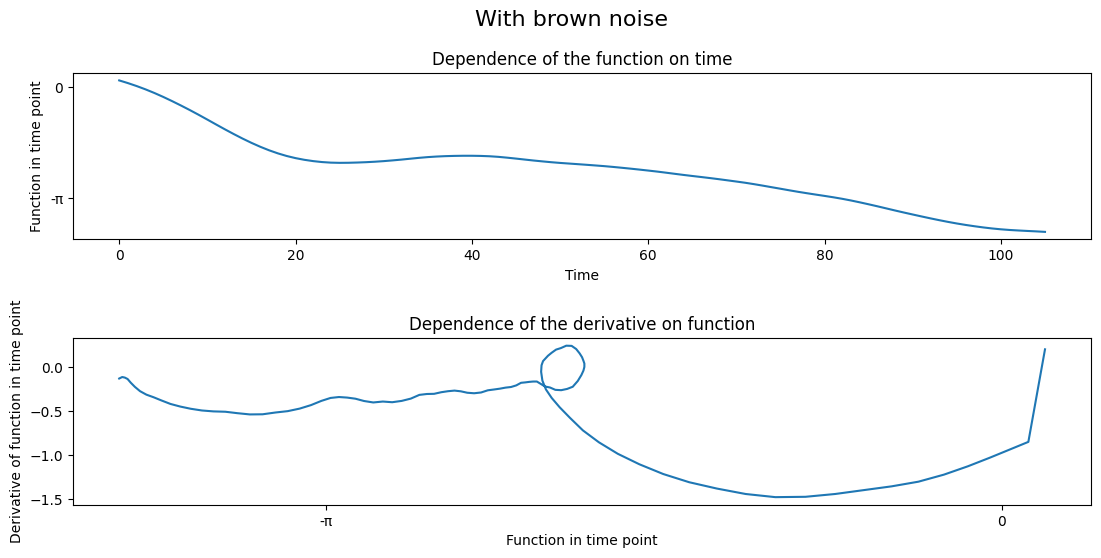

In [244]:
brown_noise = generate_noise(series_len, amplitude=lambda f: 1/f/f)
x_ts, d_ts = get_samples(noise=brown_noise)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
fig.tight_layout(pad=5.)
fig.suptitle('With brown noise', fontsize=16)

ax1.set_yticks(*get_rad_ticks(-1, 2))
ax1.set_title('Dependence of the function on time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Function in time point')
ax1.plot(x_ts)

ax2.set_xticks(*get_rad_ticks(-1, 2))
ax2.set_title('Dependence of the derivative on function')
ax2.set_xlabel('Function in time point')
ax2.set_ylabel('Derivative of function in time point')
ax2.plot(x_ts, d_ts)

## Pink noise

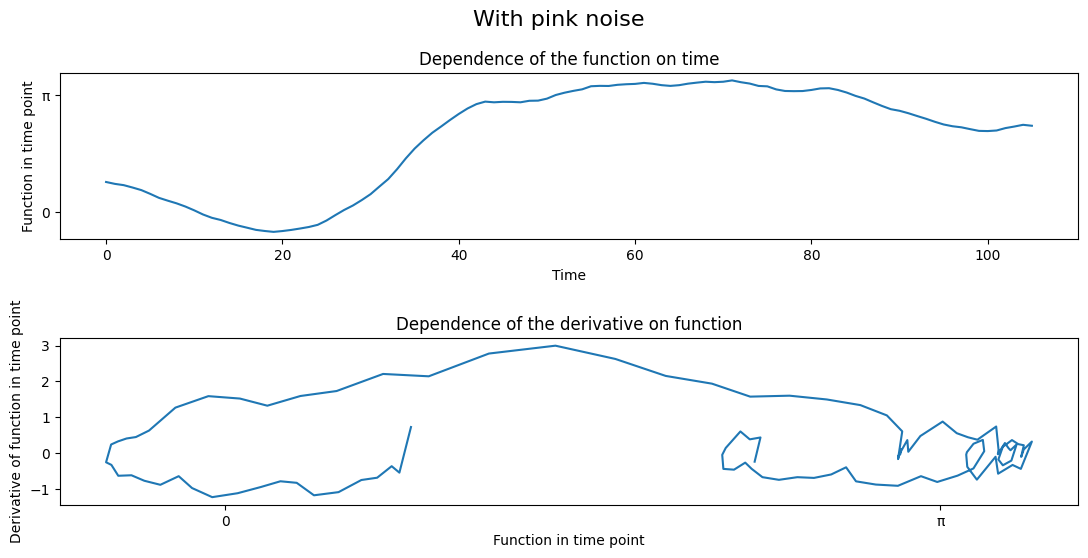

In [245]:
pink_noise = generate_noise(series_len, amplitude=lambda f: 1/f)
x_ts, d_ts = get_samples(noise=pink_noise)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
fig.tight_layout(pad=5.)
fig.suptitle('With pink noise', fontsize=16)

ax1.set_yticks(*get_rad_ticks(-3, 2))
ax1.set_title('Dependence of the function on time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Function in time point')
ax1.plot(x_ts)

ax2.set_xticks(*get_rad_ticks(-3, 2))
ax2.set_title('Dependence of the derivative on function')
ax2.set_xlabel('Function in time point')
ax2.set_ylabel('Derivative of function in time point')
ax2.plot(x_ts, d_ts)

## Blue noise

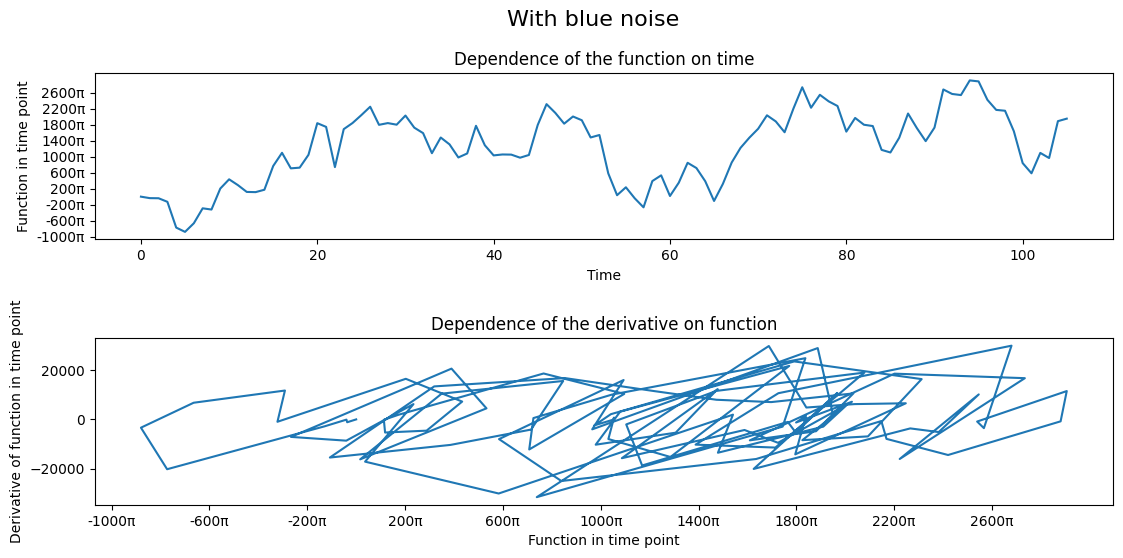

In [246]:
blue_noise = generate_noise(series_len, amplitude=lambda f: f)
x_ts, d_ts = get_samples(noise=blue_noise)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
fig.tight_layout(pad=5.)
fig.suptitle('With blue noise', fontsize=16)

ax1.set_yticks(*get_rad_ticks(-1800, 3000, 400))
ax1.set_title('Dependence of the function on time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Function in time point')
ax1.plot(x_ts)

ax2.set_xticks(*get_rad_ticks(-1800, 3000, 400))
ax2.set_title('Dependence of the derivative on function')
ax2.set_xlabel('Function in time point')
ax2.set_ylabel('Derivative of function in time point')
ax2.plot(x_ts, d_ts)

## Violet noise

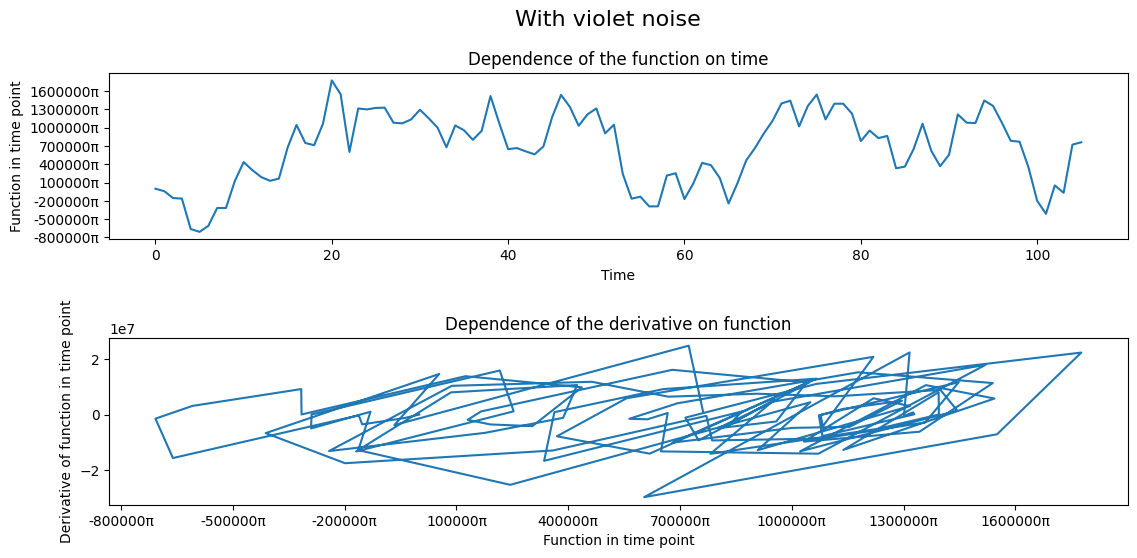

In [248]:
violet_noise = generate_noise(series_len, amplitude=lambda f: f*f)
x_ts, d_ts = get_samples(noise=violet_noise)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 6))
fig.tight_layout(pad=5.)
fig.suptitle('With violet noise', fontsize=16)

ax1.set_yticks(*get_rad_ticks(-1_700_000, 1_800_000, 300_000))
ax1.set_title('Dependence of the function on time')
ax1.set_xlabel('Time')
ax1.set_ylabel('Function in time point')
ax1.plot(x_ts)

ax2.set_xticks(*get_rad_ticks(-1_700_000, 1_800_000, 300_000))
ax2.set_title('Dependence of the derivative on function')
ax2.set_xlabel('Function in time point')
ax2.set_ylabel('Derivative of function in time point')
ax2.plot(x_ts, d_ts)